The Spark Foundation - Data Science and Business Analytics Internship

Task-4:Exploratory Data Analysis-Terrorism

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [6]:
data= pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,51,53,54,55,57,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [7]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [13]:
data.rename(columns= {'iyear':'Year','imonth':'Month','iday':'day','gname':'Group','country_txt':'Country','region_txt':'Region',
                      'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude',
                      'summary':'summary','attacktype1_txt':'Attacktype',
                      'targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound'},inplace=True)

In [14]:
data=data[['Year','Month','day','Country','State','Region','City','latitude','longitude','Attacktype','kill','Wound',
           'target1','summary','Group','Targettype','Weapon','motive']]

In [15]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
data.shape

(131468, 18)

In [17]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           419
Region            0
City            434
latitude       4269
longitude      4270
Attacktype        0
kill           7418
Wound         11427
target1         636
summary       66129
Group             0
Targettype        0
Weapon            0
motive        88141
dtype: int64

In [18]:
data['Wound']= data['Wound'].fillna(0)
data['kill']= data['kill'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131468 entries, 0 to 131467
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        131468 non-null  int64  
 1   Month       131468 non-null  int64  
 2   day         131468 non-null  int64  
 3   Country     131468 non-null  object 
 4   State       131049 non-null  object 
 5   Region      131468 non-null  object 
 6   City        131034 non-null  object 
 7   latitude    127199 non-null  float64
 8   longitude   127198 non-null  float64
 9   Attacktype  131468 non-null  object 
 10  kill        131468 non-null  float64
 11  Wound       131468 non-null  float64
 12  target1     130832 non-null  object 
 13  summary     65339 non-null   object 
 14  Group       131468 non-null  object 
 15  Targettype  131468 non-null  object 
 16  Weapon      131468 non-null  object 
 17  motive      43327 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [21]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,131468.000000,131468.000000,131468.000000,127199.000000,1.271980e+05,131468.000000,131468.000000
mean,1997.729645,6.355760,15.380640,22.441231,-6.585345e+02,2.124266,2.955099
std,12.464271,3.416323,8.829476,20.113816,2.416552e+05,10.320123,39.574922
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1987.000000,3.000000,8.000000,8.799564,-6.576051e+00,0.000000,0.000000
50%,1997.000000,6.000000,15.000000,30.510054,3.550351e+01,0.000000,0.000000
75%,2010.000000,9.000000,23.000000,35.166758,6.821800e+01,1.000000,1.000000
max,2014.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000


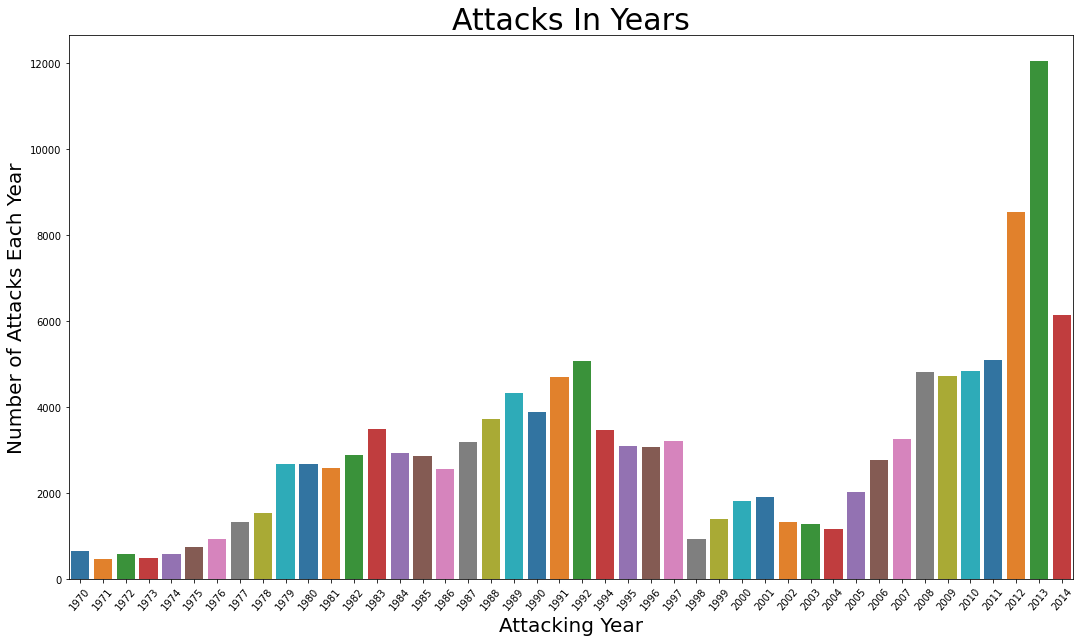

In [22]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x=year,
            y=years_count,
            palette='tab10')
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

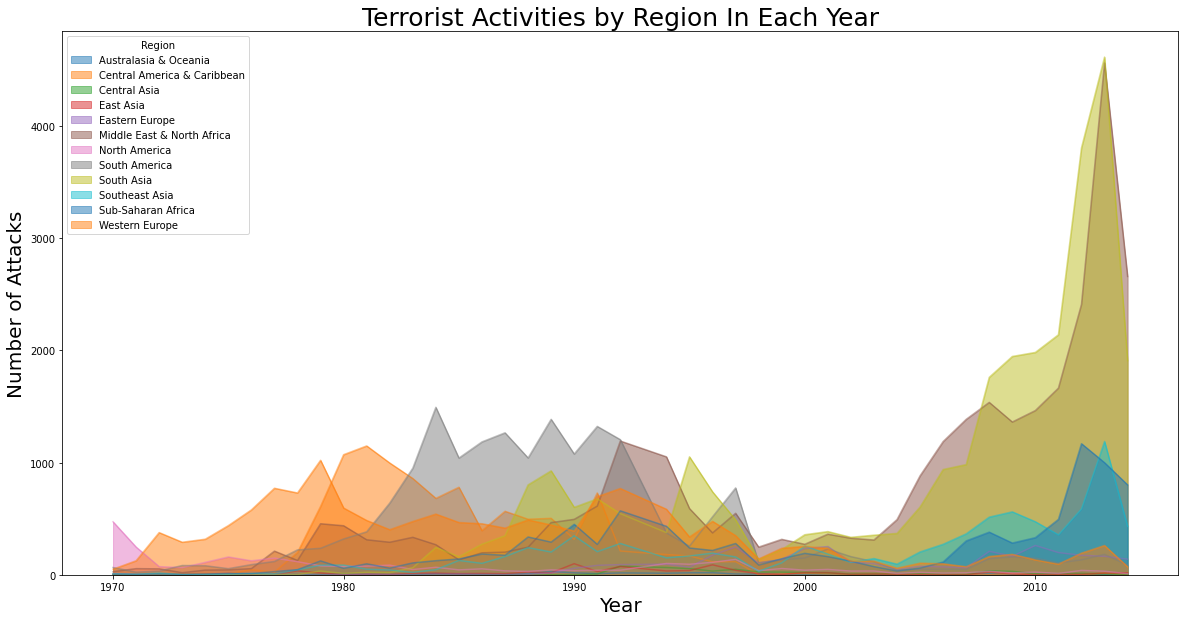

In [25]:
pd.crosstab(data.Year,data.Region).plot(kind = 'area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities by Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

In [27]:
attack = data.Country.value_counts()[:10]
attack

Iraq              13862
Pakistan          10267
India              8596
Colombia           7785
Afghanistan        6511
Peru               6070
El Salvador        5320
United Kingdom     4829
Philippines        4449
Spain              3237
Name: Country, dtype: int64

In [28]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4539
Taliban                                             3544
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2283
Basque Fatherland and Freedom (ETA)                 2024
New People's Army (NPA)                             1710
Liberation Tigers of Tamil Eelam (LTTE)             1606
Communist Party of India - Maoist (CPI-Maoist)      1549
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


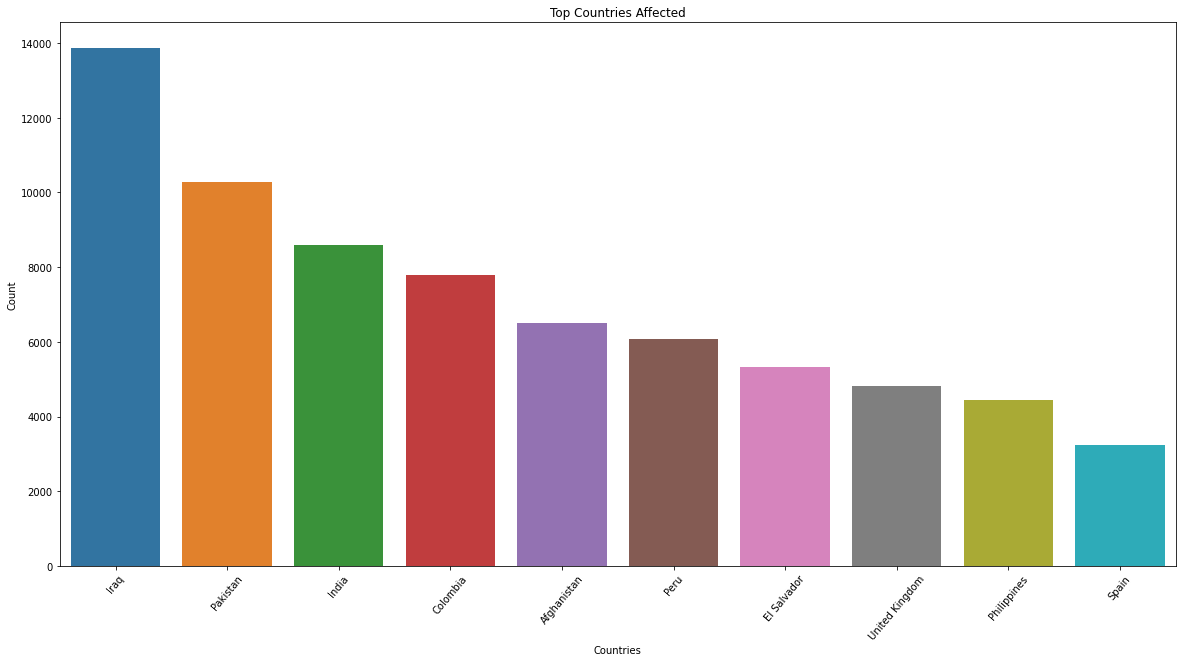

In [61]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='tab10')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()


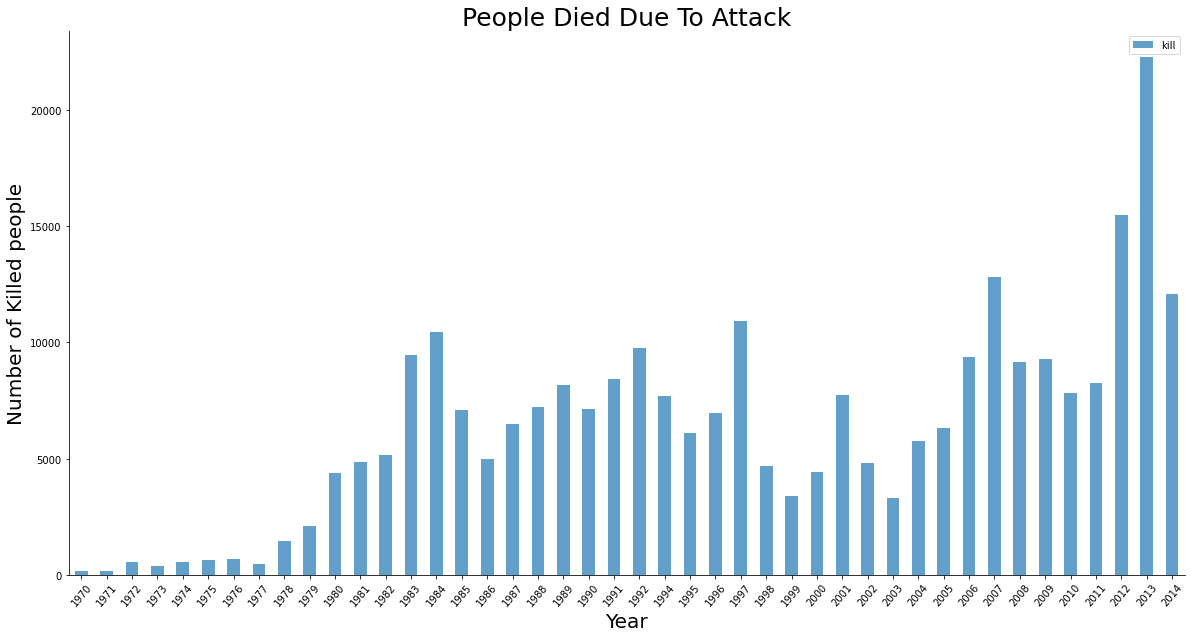

In [33]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize = (20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title('People Died Due To Attack',fontsize=25)
plt.ylabel('Number of Killed people',fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side=ax4.spines['top']
top_side.set_visible(False)
right_side= ax4.spines["right"]
right_side.set_visible(False)

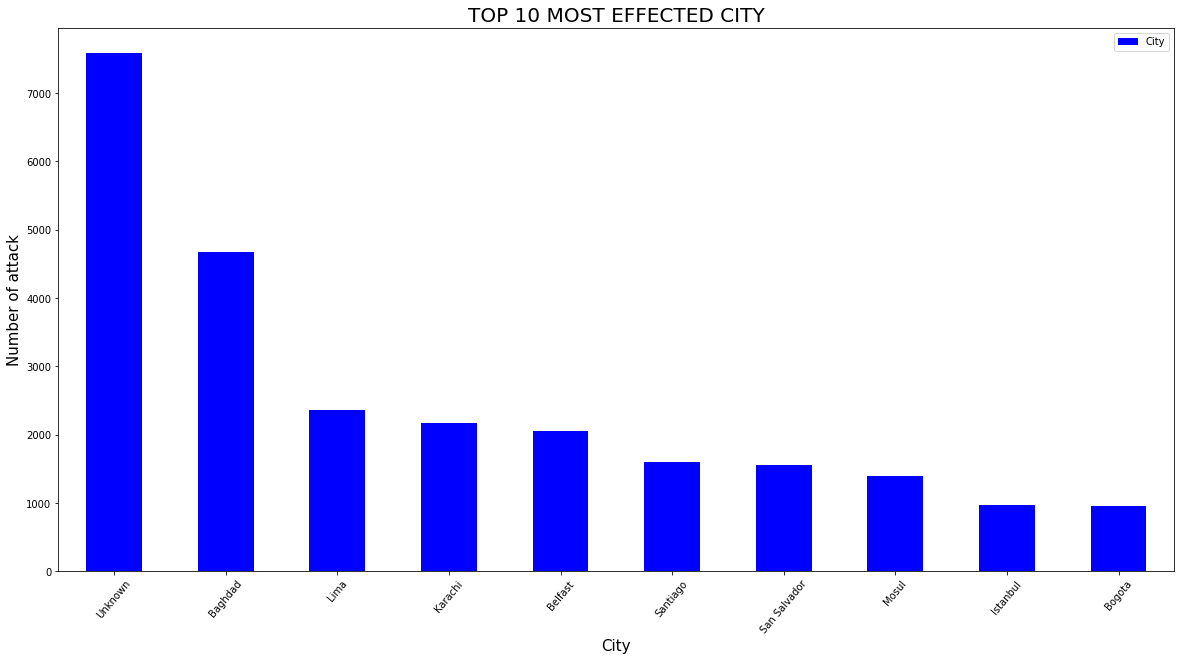

In [36]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel("City",fontsize=15)
plt.ylabel('Number of attack',fontsize=15)
plt.title("TOP 10 MOST EFFECTED CITY",fontsize=20)
plt.show()

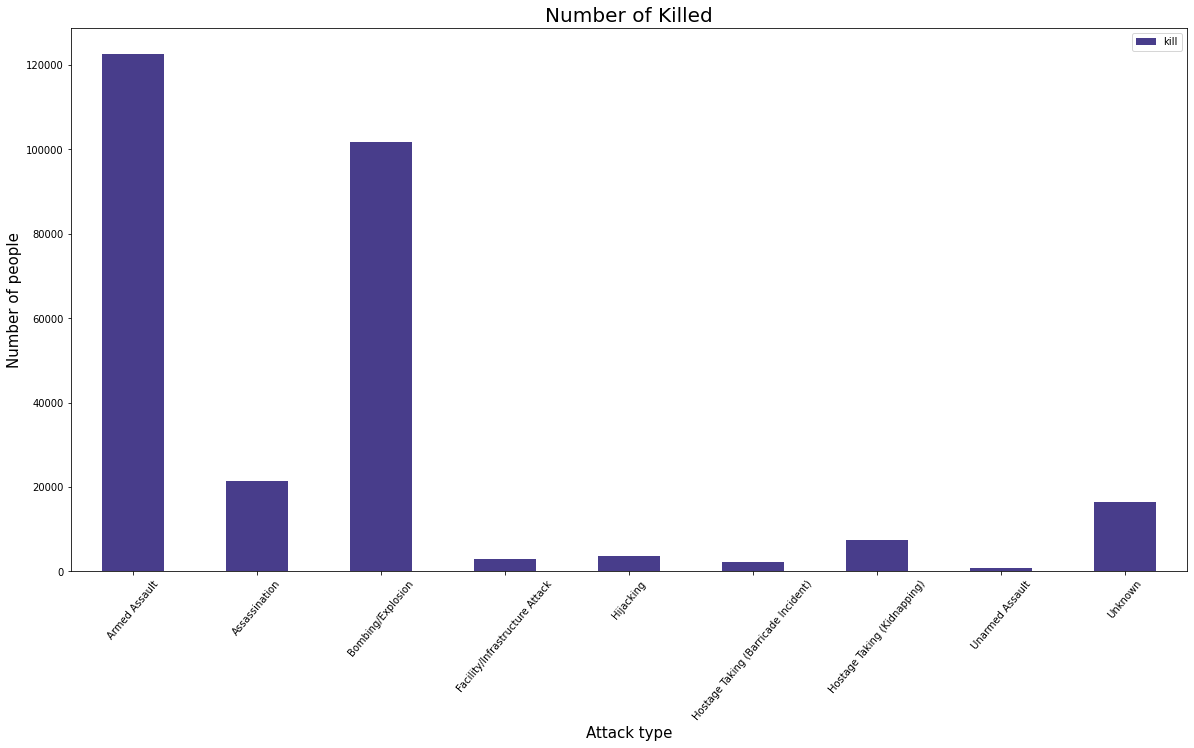

In [38]:
data[['Attacktype','kill']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of Killed",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

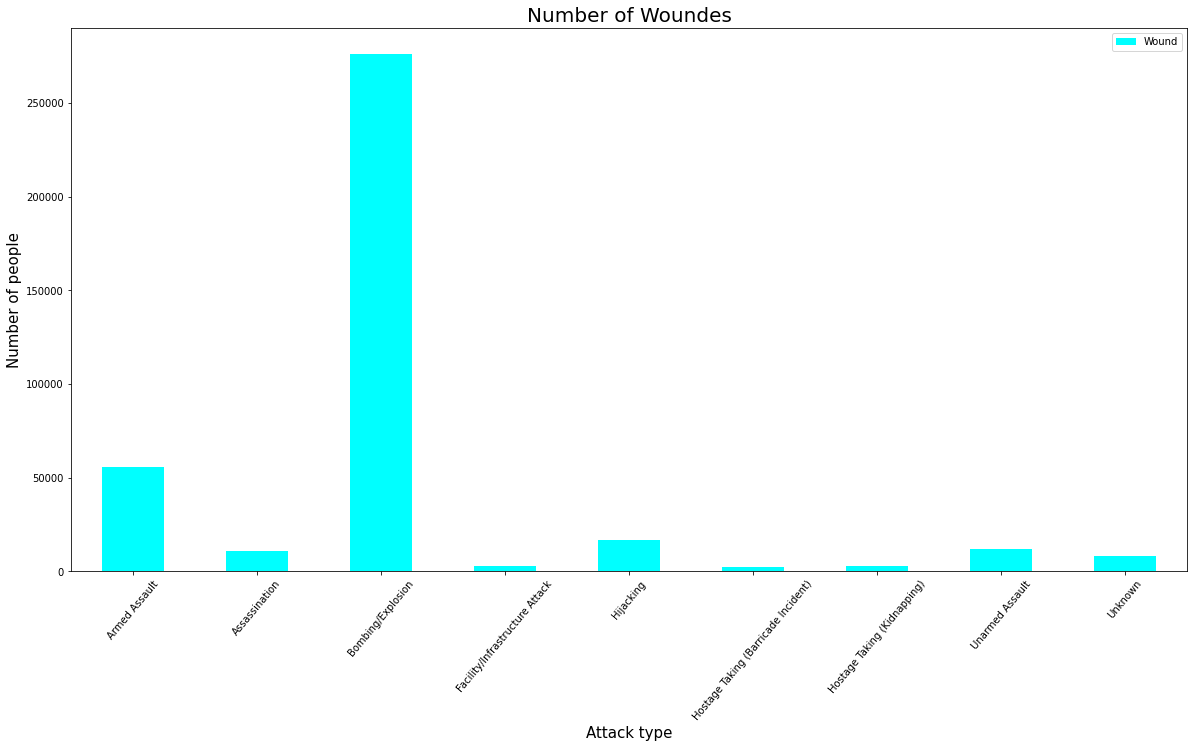

In [39]:
data[['Attacktype','Wound']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation= 50)
plt.title("Number of Woundes",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


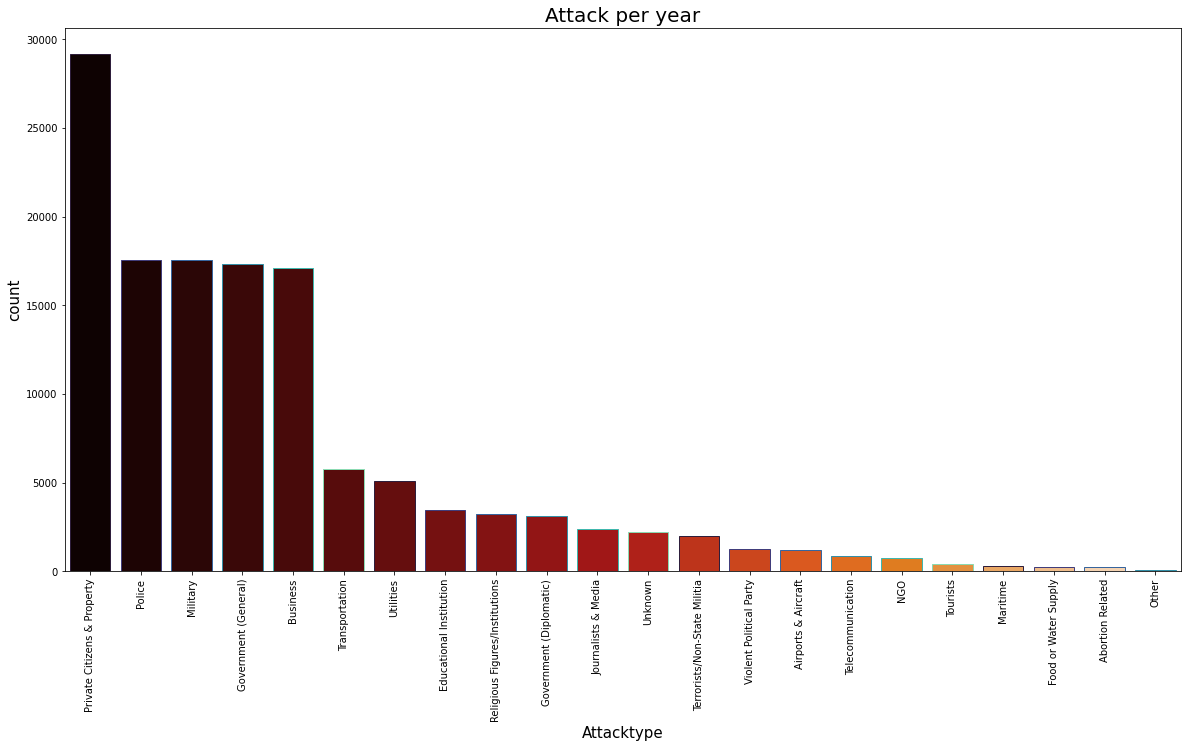

In [42]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation =90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

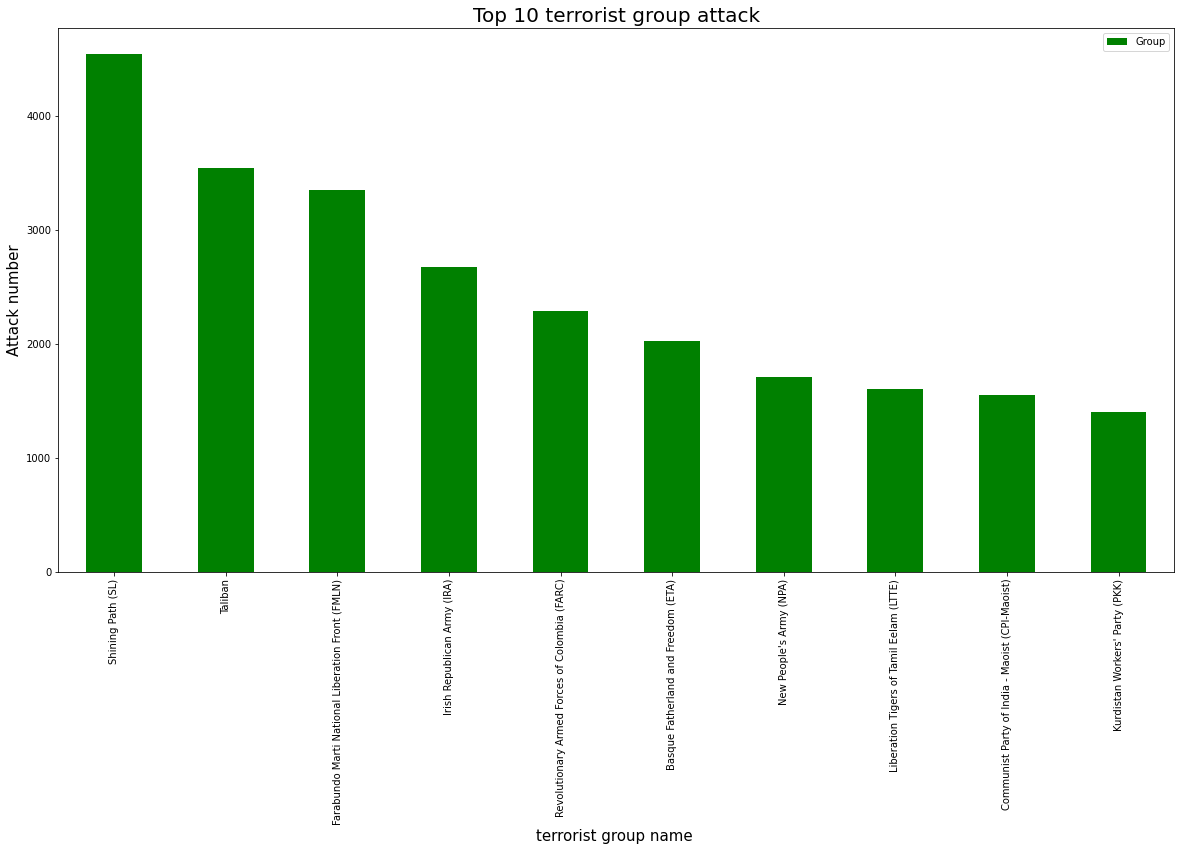

In [44]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name ",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

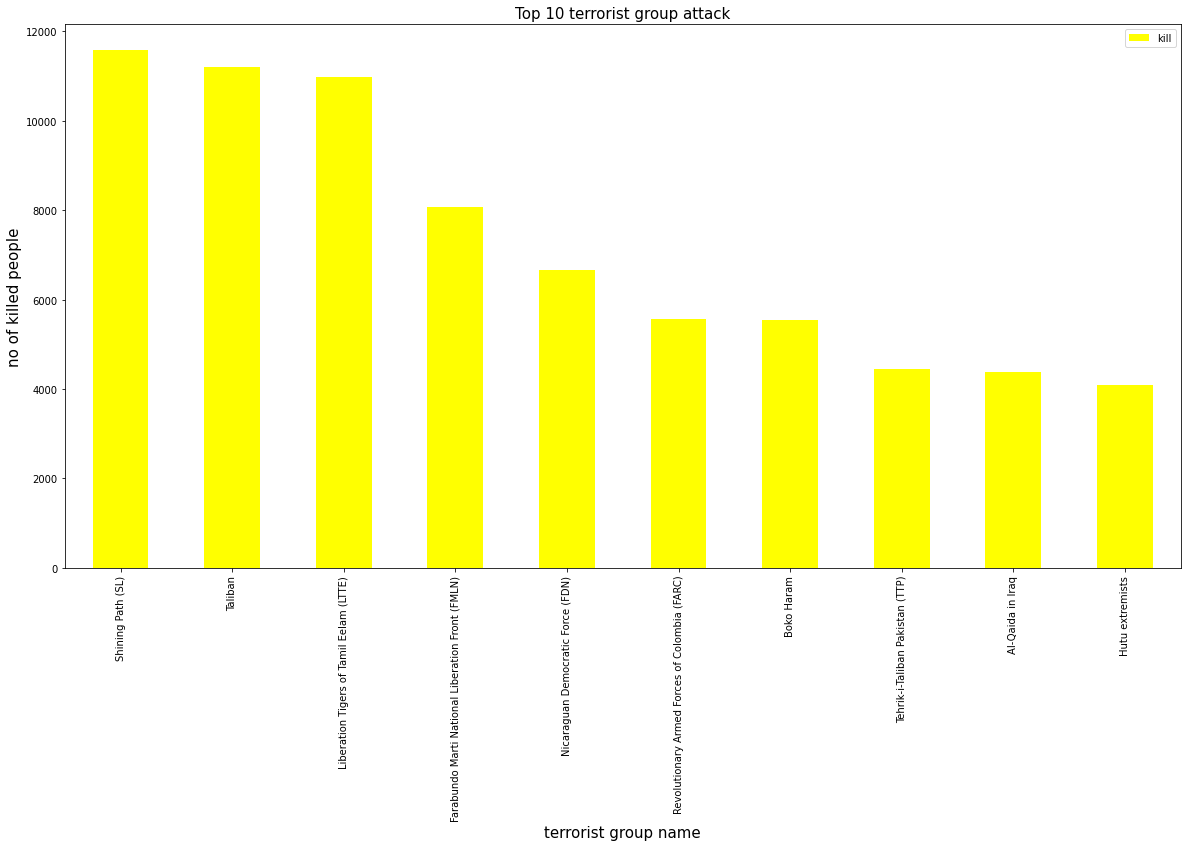

In [47]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=15)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("no of killed people",fontsize=15)
plt.show()

In [49]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Shining Path (SL),Peru,11575.0
1,Taliban,Afghanistan,11061.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
3,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
4,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,5542.0
6,Boko Haram,Nigeria,5526.0
7,Tehrik-i-Taliban Pakistan (TTP),Pakistan,4427.0
8,Al-Qaida in Iraq,Iraq,4273.0
9,Kurdistan Workers' Party (PKK),Turkey,3754.0


In [50]:
kill=data.loc[:,'kill']
print('Number of people killeed by terror attack:',int(sum(kill.dropna())))


Number of people killeed by terror attack: 279273


In [52]:
typeKill = data.pivot_table(columns='Attacktype',values='kill',aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,122638.0,21332.0,101797.0,2947.0,3603.0,2264.0,7418.0,727.0,16547.0


In [56]:
countrykill = data.pivot_table(columns='Country',values='kill', aggfunc='sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,16908.0,41.0,10999.0,0.0,3036.0,0.0,490.0,31.0,13.0,28.0,252.0,1.0,29.0,1038.0,76.0,14.0,37.0,3.0,0.0,9.0,42.0,75.0,11.0,199.0,0.0,28.0,3.0,3884.0,543.0,143.0,351.0,700.0,723.0,225.0,609.0,14378.0,1.0,17.0,248.0,8.0,...,96.0,1267.0,15523.0,0.0,2.0,3065.0,29.0,6.0,13.0,74.0,4023.0,60.0,291.0,48.0,2344.0,76.0,6.0,134.0,5140.0,3.0,2881.0,106.0,122.0,3358.0,3532.0,5.0,68.0,0.0,0.0,211.0,1.0,0.0,1182.0,97.0,1.0,3095.0,119.0,324.0,70.0,154.0
